In [16]:
import os
import numpy as np
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
from utils.similarity import *


In [17]:
A1 = torch.tensor([[ 0.0284, -0.0550, -0.0332, 0.1324,  0.1340, -0.0651],
            [ 0.0383, -0.0496, -0.0417, 0.1314,  0.1107, -0.0767],
            [ 0.0295, -0.0548, -0.0333, 0.1334,  0.1345, -0.0660]] , dtype=torch.float32)

A2 = torch.tensor([[ 0.0297, -0.0589, -0.0405,  0.1301,  0.1309, -0.0682],
                   [ 0.0389, -0.0533, -0.0474,  0.1302,  0.1068, -0.0794],
                   [ 0.0305, -0.0587, -0.0407,  0.1313,  0.1313, -0.0691]] , dtype=torch.float32)

In [18]:
sim = F.cosine_similarity(A1, A2, dim=1)
print(sim)

tensor([0.9989, 0.9991, 0.9989])


In [19]:
A1_norm = torch.norm(A1.type(torch.cuda.FloatTensor), 'fro')
A2_norm = torch.norm(A2.type(torch.cuda.FloatTensor), 'fro')
A1_A2 = A1_norm * A2_norm
sim = ((A1*A2).sum() / A1_A2).item()

print(sim)

0.9990076422691345


In [20]:
A1_norm

tensor(0.3619, device='cuda:0')

In [21]:
A1

tensor([[ 0.0284, -0.0550, -0.0332,  0.1324,  0.1340, -0.0651],
        [ 0.0383, -0.0496, -0.0417,  0.1314,  0.1107, -0.0767],
        [ 0.0295, -0.0548, -0.0333,  0.1334,  0.1345, -0.0660]])

<AxesSubplot:>

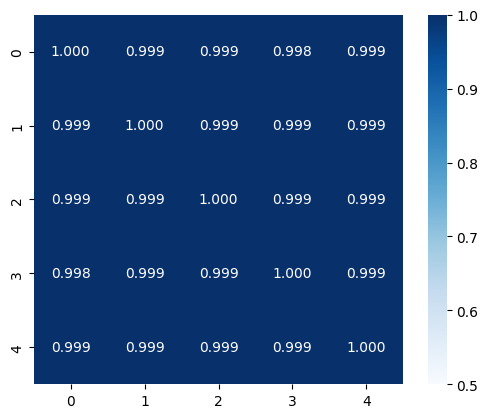

In [29]:
sim_mat = np.array([[1.        , 0.99850935, 0.99871224, 0.99829483, 0.99880469],
                    [0.99850935, 0.99999988, 0.99868429, 0.99931198, 0.99856138],
                    [0.99871224, 0.99868429, 0.99999994, 0.99875718, 0.9991855 ],
                    [0.99829483, 0.99931198, 0.99875718, 1.        , 0.99852574],
                    [0.99880469, 0.99856138, 0.9991855 , 0.99852574, 1.00000012]])

sns.heatmap(sim_mat,square=True,annot=True,fmt=".3f",linecolor='white',cmap='Blues',vmin=0.5)

In [ ]:
_